In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.constraints import MaxNorm

In [2]:
def generate_data(samples=1000, features=20):
    X = np.random.randn(samples, features)
    return X, X

In [3]:
class WeightTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.weights_history.append(self.model.layers[1].get_weights()[0].flatten())

In [4]:
def custom_zero_loss(y_true, y_pred):
    mse_loss = tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred))
    zero_loss = tf.keras.backend.mean(tf.keras.backend.square(y_pred))
    return mse_loss + 100.0 * zero_loss 


In [5]:
def build_autoencoder_custom_loss(input_shape):
    # Encoder
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Dense(32, activation='relu')(encoder_input)
    latent_space = layers.Dense(16, activation='relu')(x)
    
    # Decoder
    x = layers.Dense(32, activation='relu')(latent_space)
    decoder_output = layers.Dense(input_shape[0], activation='linear')(x)
    
    # Autoencoder model
    autoencoder = models.Model(encoder_input, decoder_output)
    
    return autoencoder


In [6]:
# Generate data
X_train, y_train = generate_data()
X_test, y_test = generate_data()

In [7]:

input_shape = (X_train.shape[1],)
autoencoder_custom = build_autoencoder_custom_loss(input_shape)
autoencoder_custom.compile(optimizer='adam', loss=custom_zero_loss)
weight_tracker = WeightTracker()
history_custom = autoencoder_custom.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[weight_tracker])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.2529 - val_loss: 3.1613
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8987 - val_loss: 1.8801
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 1.8857 - val_loss: 1.5409
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.5551 - val_loss: 1.3904
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 1.4169 - val_loss: 1.2962
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 1.3006 - val_loss: 1.2307
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 1.2246 - val_loss: 1.1841
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 1.1928 - val_loss: 1.1481
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 1.1736 - val_loss: 1.1206
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1387 - val_loss: 1.0991
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 1.0979 - val_loss: 1.0814
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - lo

In [8]:
def build_autoencoder_with_maxnorm(input_shape):
    max_norm_value = 2.0  
    # Encoder
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Dense(32, activation='relu', kernel_constraint=MaxNorm(max_value=max_norm_value))(encoder_input)
    latent_space = layers.Dense(16, activation='relu', kernel_constraint=MaxNorm(max_value=max_norm_value))(x)
    # Decoder
    x = layers.Dense(32, activation='relu', kernel_constraint=MaxNorm(max_value=max_norm_value))(latent_space)
    decoder_output = layers.Dense(input_shape[0], activation='linear', kernel_constraint=MaxNorm(max_value=max_norm_value))(x)
    # Autoencoder model
    autoencoder = models.Model(encoder_input, decoder_output)
    
    return autoencoder

In [9]:
input_shape = (X_train.shape[1],)
autoencoder_maxnorm = build_autoencoder_with_maxnorm(input_shape)

# Compile the model using MSE loss and the Adam optimizer
autoencoder_maxnorm.compile(optimizer='adam', loss='mse')

# Train the autoencoder
# Instantiate the weight tracker callback
weight_tracker = WeightTracker()

# Train the autoencoder and collect weights
history_maxnorm = autoencoder_maxnorm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[weight_tracker])


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0785 - val_loss: 0.9846
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9783 - val_loss: 0.9440
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9455 - val_loss: 0.9104
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.9043 - val_loss: 0.8727
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.8723 - val_loss: 0.8281
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.8179 - val_loss: 0.7770
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.7601 - val_loss: 0.7264
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.7028 - val_loss: 0.6822
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.6621 - val_loss: 0.6469
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.6237 - val_loss: 0.6128
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.5867 - val_loss: 0.5842
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - los

In [10]:
def build_autoencoder_with_l2(input_shape):
    l2_reg = regularizers.l2(0.001) 
    # Encoder
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Dense(32, activation='relu', kernel_regularizer=l2_reg)(encoder_input)
    latent_space = layers.Dense(16, activation='relu', kernel_regularizer=l2_reg)(x)
    # Decoder
    x = layers.Dense(32, activation='relu', kernel_regularizer=l2_reg)(latent_space)
    decoder_output = layers.Dense(input_shape[0], activation='linear', kernel_regularizer=l2_reg)(x)
    # Autoencoder model
    autoencoder = models.Model(encoder_input, decoder_output)
    return autoencoder

In [11]:
input_shape = (X_train.shape[1],)
autoencoder_l2 = build_autoencoder_with_l2(input_shape)

autoencoder_l2.compile(optimizer='adam', loss='mse')

weight_tracker = WeightTracker()
history_l2 = autoencoder_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[weight_tracker])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1600 - val_loss: 1.0364
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0606 - val_loss: 0.9966
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0131 - val_loss: 0.9558
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.9806 - val_loss: 0.9066
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.9239 - val_loss: 0.8530
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.8401 - val_loss: 0.7994
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.7994 - val_loss: 0.7439
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.7498 - val_loss: 0.6957
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.6918 - val_loss: 0.6527
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.6575 - val_loss: 0.6101
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.6085 - val_loss: 0.5737
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - los

In [12]:
# Example: Compute MSE and output magnitude for each model
def evaluate_model(autoencoder, X_test):
    # Predict outputs
    predictions = autoencoder.predict(X_test)
    
    # Compute Mean Squared Error
    mse = np.mean(np.square(predictions - X_test))
    
    # Compute average output magnitude
    avg_output_magnitude = np.mean(np.abs(predictions))
    
    return mse, avg_output_magnitude

# Assuming X_test is a dataset used for evaluation
mse_custom, avg_output_custom = evaluate_model(autoencoder_custom, X_test)
mse_maxnorm, avg_output_maxnorm = evaluate_model(autoencoder_maxnorm, X_test)
mse_l2, avg_output_l2 = evaluate_model(autoencoder_l2, X_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


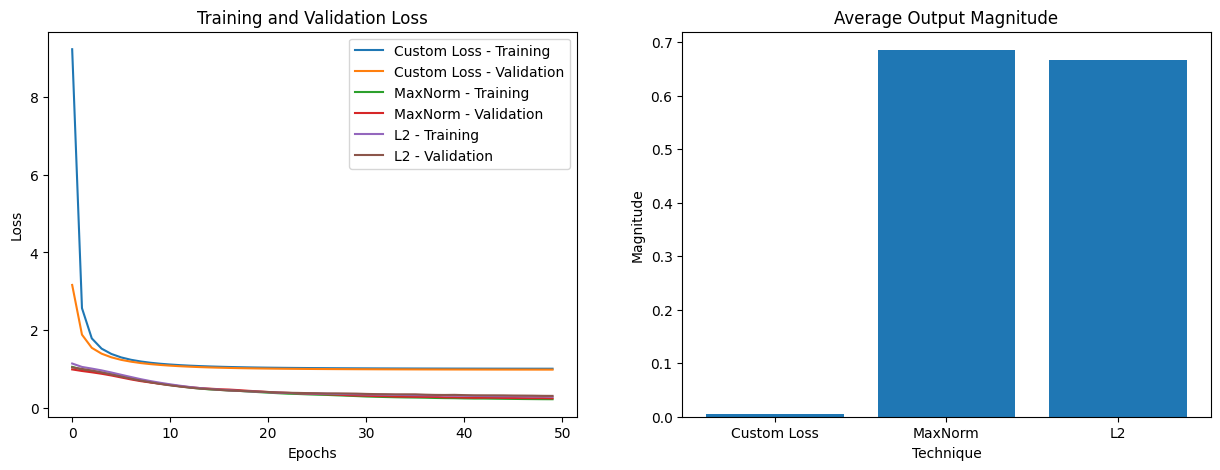

In [13]:
# Plot Training and Validation Loss
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_custom.history['loss'], label='Custom Loss - Training')
plt.plot(history_custom.history['val_loss'], label='Custom Loss - Validation')
plt.plot(history_maxnorm.history['loss'], label='MaxNorm - Training')
plt.plot(history_maxnorm.history['val_loss'], label='MaxNorm - Validation')
plt.plot(history_l2.history['loss'], label='L2 - Training')
plt.plot(history_l2.history['val_loss'], label='L2 - Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Output Magnitudes
plt.subplot(1, 2, 2)
techniques = ['Custom Loss', 'MaxNorm', 'L2']
magnitudes = [avg_output_custom, avg_output_maxnorm, avg_output_l2]
plt.bar(techniques, magnitudes)
plt.title('Average Output Magnitude')
plt.xlabel('Technique')
plt.ylabel('Magnitude')

plt.show()
